<a href="https://colab.research.google.com/github/stevengregori92/Feature-Engineering/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

#Import Dataset

In [ ]:
df = pd.read_csv('titanic.csv', index_col = 'PassengerId')
df.drop(columns = ['Name','Ticket','Cabin'], inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


#EDA (Exploratory Data Analysis)

###Target

In [ ]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

###Numeric vs Target

<ipython-input-6-19b1a4a45bd9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age[df.Survived == 0], bins = [0,5,12,18,40,120], color='r', label='Died')
<ipython-input-6-19b1a4a45bd9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age[df.Survived == 1], bins = [0,5,12,18,40,120], color

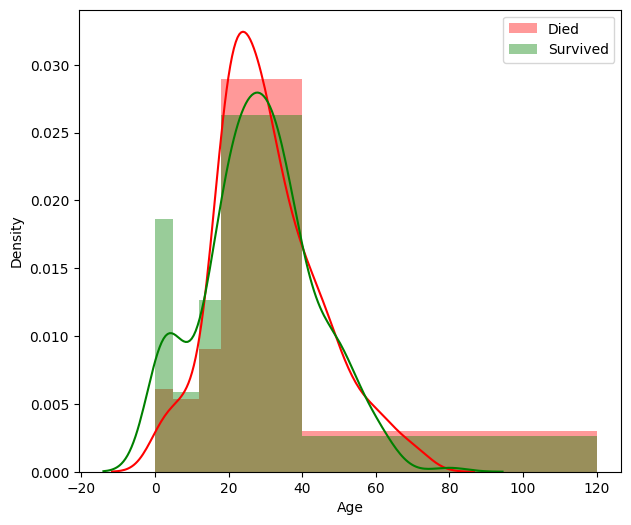

In [ ]:
plt.figure(figsize = (7,6))
sns.distplot(df.Age[df.Survived == 0], bins = [0,5,12,18,40,120], color='r', label='Died')
sns.distplot(df.Age[df.Survived == 1], bins = [0,5,12,18,40,120], color='g', label='Survived')
plt.legend()

<ipython-input-7-fc998736d5ca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare[df.Survived == 0], bins = 25, color='r', label='Died')
<ipython-input-7-fc998736d5ca>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare[df.Survived == 1], bins = 25, color='g', label='Survived')


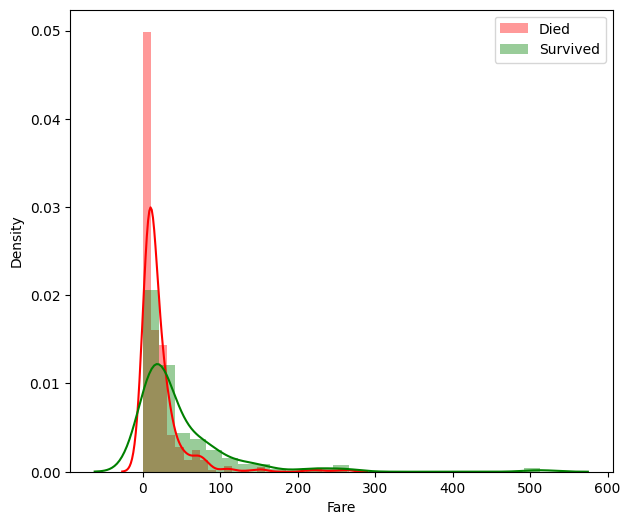

In [ ]:
plt.figure(figsize = (7,6))
sns.distplot(df.Fare[df.Survived == 0], bins = 25, color='r', label='Died')
sns.distplot(df.Fare[df.Survived == 1], bins = 25, color='g', label='Survived')
plt.legend()

###Ordinal/Categoric vs Target

<Axes: xlabel='Pclass', ylabel='count'>

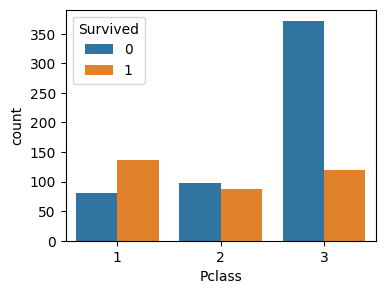

In [ ]:
plt.figure(figsize = (4,3))
sns.countplot(x = 'Pclass', data = df, hue = 'Survived')

<Axes: xlabel='Pclass', ylabel='count'>

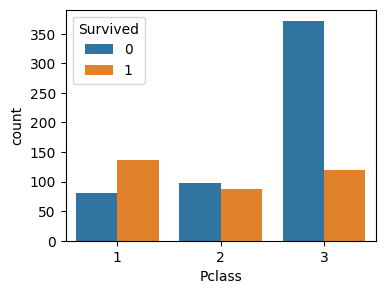

In [ ]:
plt.figure(figsize = (4,3))
sns.countplot(x = 'Pclass', data = df, hue = 'Survived')

<Axes: xlabel='SibSp', ylabel='count'>

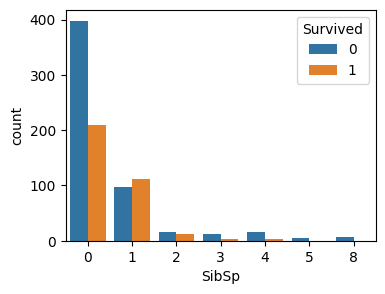

In [ ]:
plt.figure(figsize = (4,3))
sns.countplot(x = 'SibSp', data = df, hue = 'Survived')

<Axes: xlabel='Parch', ylabel='count'>

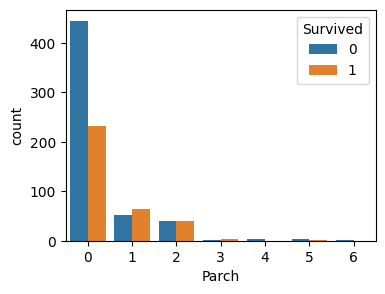

In [ ]:
plt.figure(figsize = (4,3))
sns.countplot(x = 'Parch', data = df, hue = 'Survived')

<Axes: xlabel='Embarked', ylabel='count'>

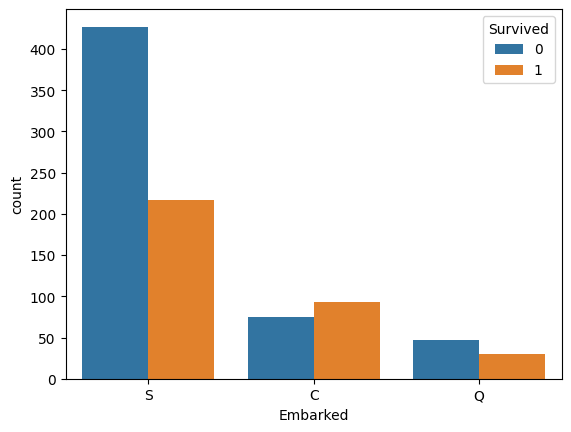

In [ ]:
sns.countplot(x = 'Embarked', data = df, hue = 'Survived')

#Pandas Crosstab

In [ ]:
pd.crosstab(df.Pclass, df.Survived, normalize = 'index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


#Feature Engineering

###Adding Feature => isAlone

In [ ]:
df['isAlone'] = (df.SibSp==0) & (df.Parch ==0)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,False
2,1,1,female,38.0,1,0,71.2833,C,False
3,1,3,female,26.0,0,0,7.9250,S,True
4,1,1,female,35.0,1,0,53.1000,S,False
5,0,3,male,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,True
888,1,1,female,19.0,0,0,30.0000,S,True
889,0,3,female,NaN,1,2,23.4500,S,False


#Binning

In [ ]:
df.Age = pd.cut(df.Age, [0,5,12,18,40,120], labels = ['balita', 'anak-anak', 'remaja','dewasa', 'lansia'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,7.2500,S,False
2,1,1,female,dewasa,1,0,71.2833,C,False
3,1,3,female,dewasa,0,0,7.9250,S,True
4,1,1,female,dewasa,1,0,53.1000,S,False
5,0,3,male,dewasa,0,0,8.0500,S,True


#Fare

In [ ]:
df.Fare = pd.cut(df.Fare, [0,25,100,600], labels = ['murah', 'mahal', 'eksektif'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S,False
2,1,1,female,dewasa,1,0,mahal,C,False
3,1,3,female,dewasa,0,0,murah,S,True
4,1,1,female,dewasa,1,0,mahal,S,False
5,0,3,male,dewasa,0,0,murah,S,True
